In [1]:
import numpy as np

In [3]:
import pandas as pd

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from sklearn.naive_bayes import MultinomialNB

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [13]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt


In [17]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
from sklearn.impute import SimpleImputer

In [23]:
from imblearn.over_sampling import SMOTE

In [25]:
train_data = pd.read_csv(r"C:\Users\lenin\train_data.txt",sep=' ::: ', header=None, engine='python')


In [27]:
test_data = pd.read_csv(r"C:\Users\lenin\test_data.txt",sep=' ::: ', header=None, engine='python')


In [29]:
train_data.columns=['SI.NO','MOVIE','MOVIETYPE','SUMMARY']


In [31]:
test_data.columns=['SI.NO','MOVIE','SUMMARY']


In [33]:
train_data.head()


,SI.NO,MOVIE,MOVIETYPE,SUMMARY
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [35]:
test_data.head()


,SI.NO,MOVIE,SUMMARY
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


In [37]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SI.NO      54214 non-null  int64 
 1   MOVIE      54214 non-null  object
 2   MOVIETYPE  54214 non-null  object
 3   SUMMARY    54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [39]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SI.NO    54200 non-null  int64 
 1   MOVIE    54200 non-null  object
 2   SUMMARY  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [41]:
train_data.describe()


,SI.NO
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [43]:
test_data.describe()


,SI.NO
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [45]:
train_data.isnull().sum()


SI.NO        0
MOVIE        0
MOVIETYPE    0
SUMMARY      0
dtype: int64

In [47]:
test_data.isnull().sum()


SI.NO      0
MOVIE      0
SUMMARY    0
dtype: int64

In [49]:
train_data.count()


SI.NO        54214
MOVIE        54214
MOVIETYPE    54214
SUMMARY      54214
dtype: int64

In [51]:
test_data.count()


SI.NO      54200
MOVIE      54200
SUMMARY    54200
dtype: int64

In [53]:
train_data.iloc[0:3]


,SI.NO,MOVIE,MOVIETYPE,SUMMARY
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...


In [55]:
train_data.loc[0]


SI.NO                                                        1
MOVIE                             Oscar et la dame rose (2009)
MOVIETYPE                                                drama
SUMMARY      Listening in to a conversation between his doc...
Name: 0, dtype: object

In [57]:
train_data.shape


(54214, 4)

In [59]:
test_data.shape


(54200, 3)

<Axes: xlabel='MOVIETYPE', ylabel='count'>

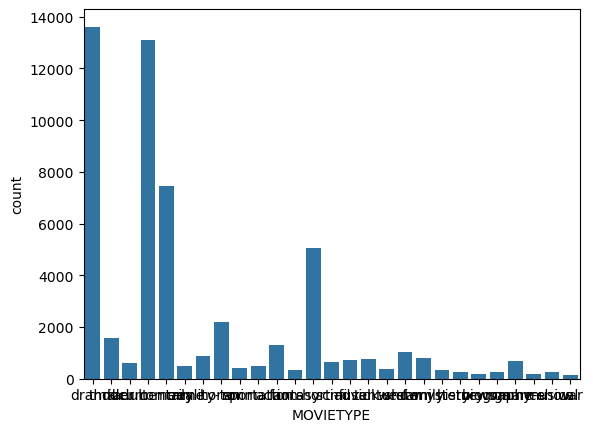

In [61]:
sns.countplot(x='MOVIETYPE', data=train_data)


Text(0.5, 0, 'Movie Category')

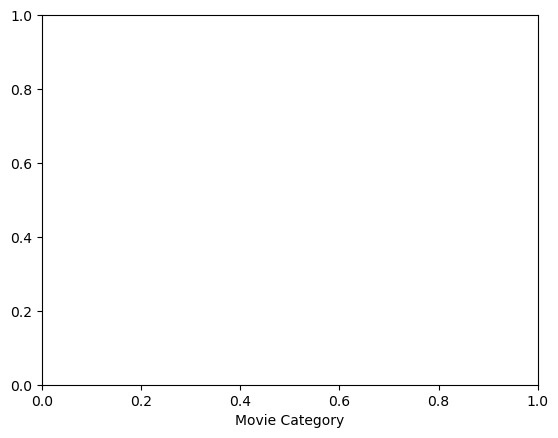

In [63]:
plt.xlabel('Movie Category')


Text(0, 0.5, 'Count')

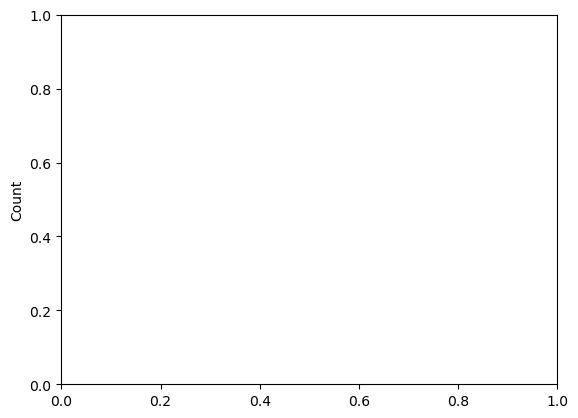

In [65]:
plt.ylabel('Count') 


Text(0.5, 1.0, 'Movie Genre Plot')

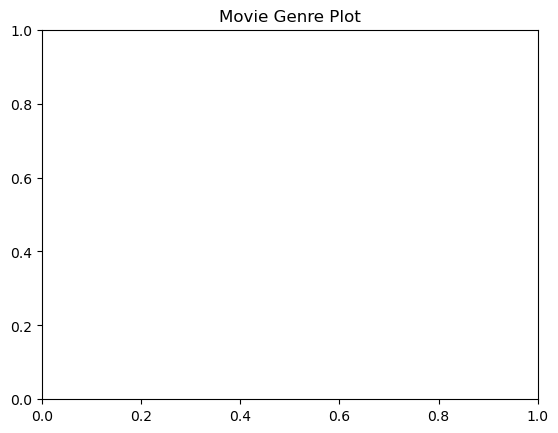

In [67]:
plt.title('Movie Genre Plot')


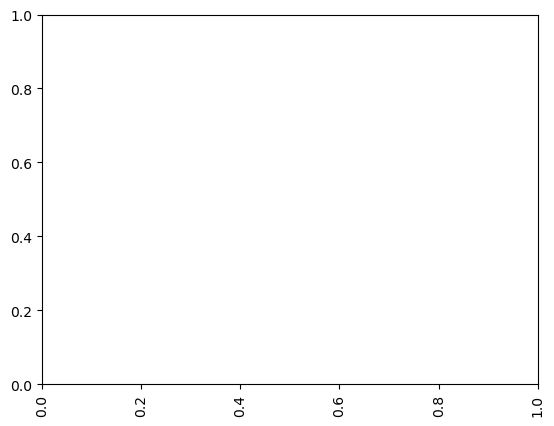

In [69]:
plt.xticks(rotation=90);


In [71]:
plt.show()


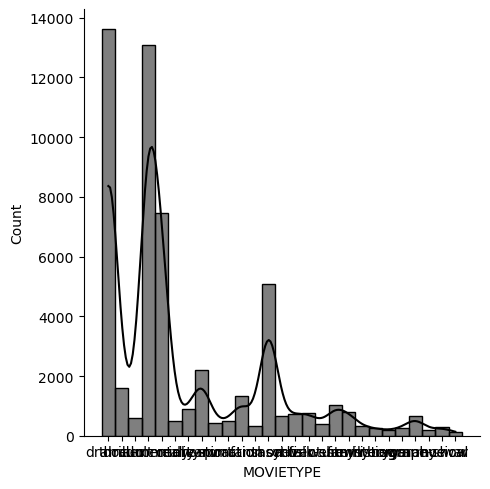

In [73]:
sns.displot(train_data.MOVIETYPE, kde =True, color = "black")


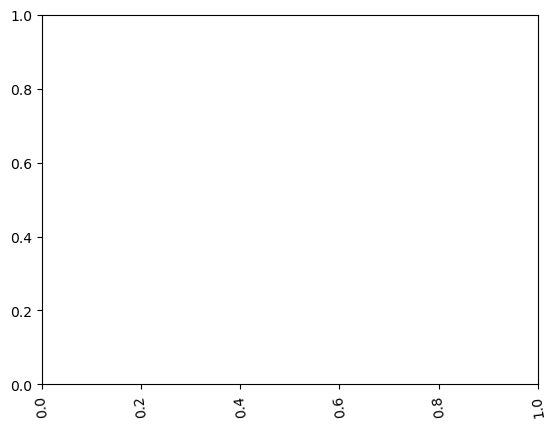

In [75]:
plt.xticks(rotation=98);


In [77]:
plt.figure(figsize = (14,10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [79]:
count1=train_data.MOVIETYPE.value_counts()


<Axes: xlabel='count', ylabel='MOVIETYPE'>

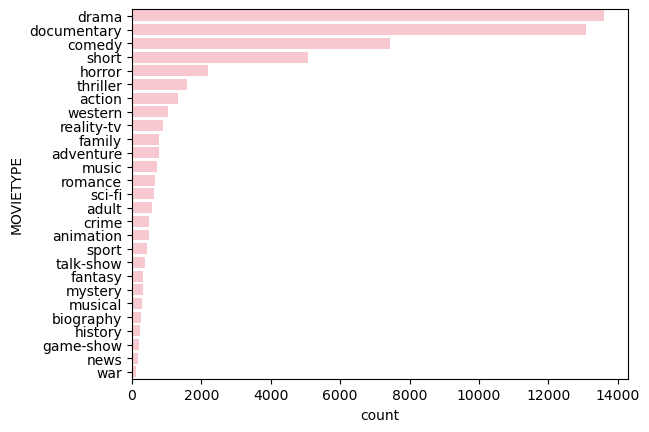

In [81]:
sns.barplot(x=count1,y=count1.index,orient='h',color='pink')


Text(0.5, 0, 'Count')

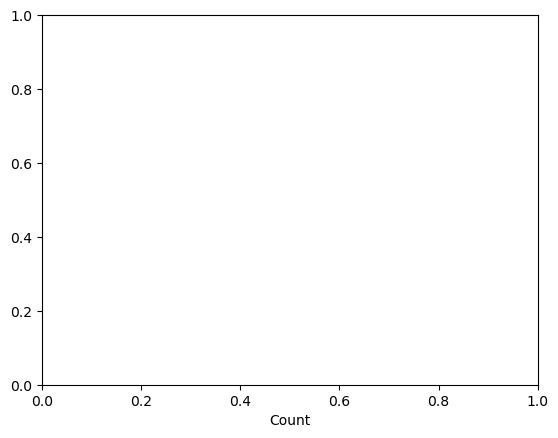

In [83]:
plt.xlabel('Count') 


Text(0.5, 0, 'movie type')

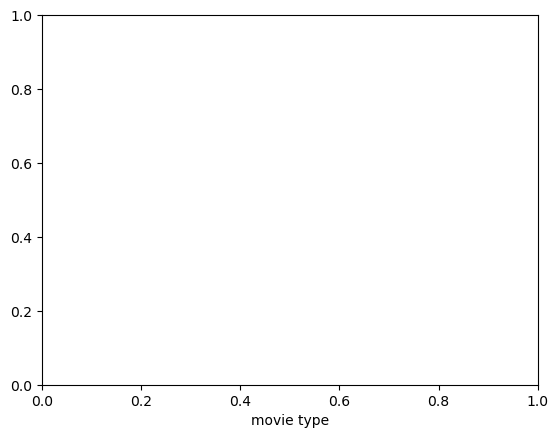

In [85]:
plt.xlabel('movie type') 


Text(0.5, 1.0, 'Movie Genre Plot')

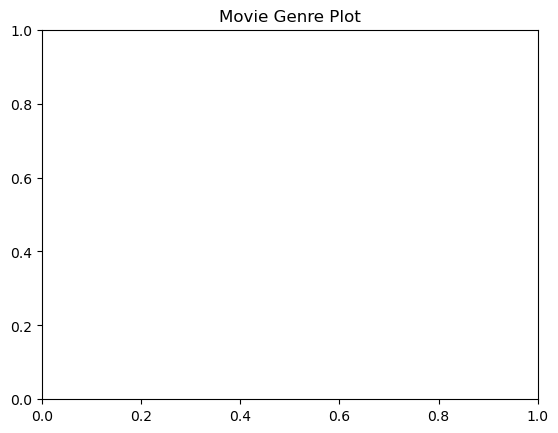

In [87]:
plt.title('Movie Genre Plot')


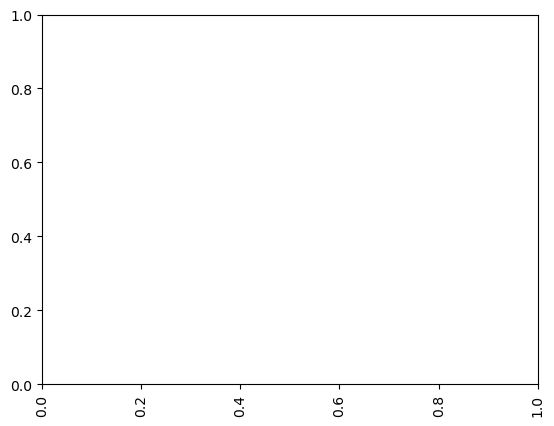

In [89]:
plt.xticks(rotation=90);


In [91]:
plt.show()


In [93]:
combined=pd.concat([train_data,test_data],axis=0)


In [95]:
combined.head()


,SI.NO,MOVIE,MOVIETYPE,SUMMARY
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [97]:
combined.shape


(108414, 4)

In [233]:
combined.size



433656

In [241]:
combined.isnull().any()

SI.NO        False
MOVIE        False
MOVIETYPE     True
SUMMARY      False
dtype: bool

In [236]:
combined.duplicated().values.any()

False

In [145]:
test_solution = pd.read_csv(r"C:\Users\lenin\train_data.txt",sep=' ::: ', header=None, engine='python')

In [147]:
test_solution.columns=['SI.NO','MOVIE','MOVIETYPE','SUMMARY']


In [149]:
test_solution.head()


,SI.NO,MOVIE,MOVIETYPE,SUMMARY
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [151]:
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1, 2))


In [153]:
label_encoder = LabelEncoder()


In [155]:
train_data['MOVIETYPE'] = label_encoder.fit_transform(train_data['MOVIETYPE'])


In [157]:
test_solution['MOVIETYPE'] = label_encoder.fit_transform(test_solution['MOVIETYPE'])


In [159]:
x_train = tfidf.fit_transform(train_data['SUMMARY'])


In [160]:
x_test = tfidf.transform(test_data['SUMMARY'])


In [161]:
y_train = train_data['MOVIETYPE']


In [165]:
y_test = test_solution['MOVIETYPE']


In [167]:
feature_names = tfidf.get_feature_names_out()


In [169]:
print("Feature Names:", feature_names)


Feature Names: ['000' '10' '100' ... 'your' 'yourself' 'youth']


In [171]:
print("X_train shape:", x_train.shape)


X_train shape: (54214, 5000)


In [173]:
print("Y_train length:", len(y_train))


Y_train length: 54214


In [175]:
print("y_train_split length:", len(y_train))


y_train_split length: 54214


In [177]:
print("y_test_split length:", len(y_test))


y_test_split length: 54214


In [179]:
x_train, x_test, y_train ,y_test = train_test_split(x_train, y_train, test_size=0.25, random_state=4)


In [181]:
print("X_train_split shape:", x_train.shape)


X_train_split shape: (40660, 5000)


In [183]:
print("X_test_split shape:", x_test.shape)


X_test_split shape: (13554, 5000)


In [185]:
print("y_train_split length:", len(y_train))


y_train_split length: 40660


In [187]:
print("y_test_split length:", len(y_test))


y_test_split length: 13554


In [243]:
model = MultinomialNB(alpha=0.5)
model.fit(x_train,y_train)

MultinomialNB(alpha=0.5)

In [193]:
y_pred = model.predict(x_test)


In [195]:
accuracy = accuracy_score(y_test, y_pred)


In [197]:
print("Accuracy:", accuracy)


Accuracy: 0.5184447395602774


In [199]:
logistic_regression_model=LogisticRegression()


In [201]:
logistic_regression_model.fit(x_train,y_train)


C:\Users\lenin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [202]:
lr_predict=logistic_regression_model.predict(x_test)


In [203]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [207]:
mse = mean_squared_error(y_test, lr_predict)


In [209]:
mae = mean_absolute_error(y_test, lr_predict)


In [211]:
r2 = r2_score(y_test, lr_predict)


In [215]:
print("Linear Regression Performance:")


Linear Regression Performance:


In [217]:
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 41.87568245536373


In [219]:
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 3.3859377305592444


In [221]:
print(f"R2 Score: {r2}")


R2 Score: -0.02609605059977138


In [223]:
print("accuracy score:",accuracy_score(y_test,lr_predict))      

accuracy score: 0.5861000442673749
